<a href="https://colab.research.google.com/github/Shontom6/ML_Algorithms/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt


Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


d:\SEM_2_SETU\ml\ML_Algorithms_shon\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\SEM_2_SETU\ml\ML_Algorithms_shon\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 21/100 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.4796 - loss: 1.1899

d:\SEM_2_SETU\ml\ML_Algorithms_shon\.venv\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - accuracy: 0.6192 - loss: 0.7721 - val_accuracy: 0.8238 - val_loss: 0.4177
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.8675 - loss: 0.3509 - val_accuracy: 0.9062 - val_loss: 0.2567
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.9382 - loss: 0.1575 - val_accuracy: 0.9162 - val_loss: 0.2337
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.9634 - loss: 0.1020 - val_accuracy: 0.8913 - val_loss: 0.3401
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.9726 - loss: 0.0728 - val_accuracy: 0.8913 - val_loss: 0.3568
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.9821 - loss: 0.0439 - val_accuracy: 0.9287 - val_loss: 0.2884
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.9937 - loss: 0.0178 - val_accuracy: 0.9175 - val_loss: 0.2974
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.9958 - loss: 0.0172 - val

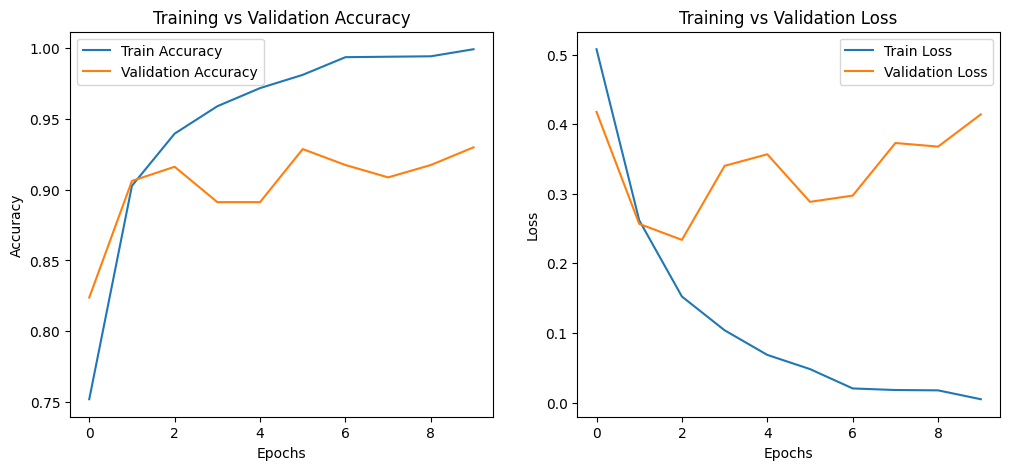

In [2]:

# Define dataset path
dataset_path = "Car-Bike-Dataset"  

# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Car or Bike)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Show the plots
plt.show()

# Save the model for future use
model.save("car_bike_classifier.h5")